In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# User inputs
file_dir  = '/Users/rmueller/Documents/UBC/MIDOSS/Data/DeptOfEcology/'
file_name = 'MuellerTrans4-30-20.xlsx'

In [4]:
df = pd.read_excel(f'{file_dir}{file_name}',sheet_name='Vessel Oil Transfer', usecols="E,H,P,Q,R")

### Extract data for oil cargo transferred to vessels for marine export approximation

In [5]:
# Get all cargo fuel transfers
bool_cargo = df['TransferType']=='Cargo'
cargo_data = df[bool_cargo]

In [11]:
oil_traffic = {}
oil_traffic['destination']={}

for reciever in cargo_data.Receiver:
    # create a list of all recieving entities
    if reciever not in oil_traffic['destination']:
        oil_traffic['destination'][f'{reciever}']=reciever
    # create a list of all refinery destinations
    #if receiver.str.contains('Refinery')
#oil_traffic['destination']

### Evaulate marine oil export

In [76]:
# remove cargo fuel transfers to land-based entity in order to isolate ship traffic data
oil_traffic['cargo'] = {}
cargo_data = cargo_data[~cargo_data.Receiver.str.contains('Refinery')]
cargo_data = cargo_data[~cargo_data.Receiver.str.contains('Terminal')]
cargo_data = cargo_data[~cargo_data.Receiver.str.contains('NASWI')]

# cargo_data is no longer indexed chronologically after removing 'Refinery', 'Terminal' and 'NASWI' entries
# need to re-set indexing in order to use row-index as data_frame index
cargo_data.reset_index(drop=True, inplace=True)
[nrows,ncols] = cargo_data.shape

# introduce dictionary entries for fuel volume export
oil_traffic['cargo']['atb_volume_export'] = 0
oil_traffic['cargo']['barge_volume_export'] = 0
oil_traffic['cargo']['other_export'] = 0

# total up volume of oil transferred onto ATB BARGES, non-ATB barges, and other vessels
for rows in range(nrows):
    if 'ATB' in cargo_data.Receiver[rows]:
        oil_traffic['cargo']['atb_volume_export'] = oil_traffic['cargo']['atb_volume_export'] + cargo_data.TransferQtyInGallon[rows]
    elif '*BARGE*' in cargo_data.Receiver[rows] or '*Barge*' in cargo_data.Receiver[rows]:  # and not 'ATB' in cargo_data.Receiver[rows]:  
        oil_traffic['cargo']['barge_volume_export'] = oil_traffic['cargo']['barge_volume_export'] + cargo_data.TransferQtyInGallon[rows]
        cargo_data.TransferQtyInGallon[rows]
    else:
        oil_traffic['cargo']['other_export'] = oil_traffic['cargo']['other_export'] + cargo_data.TransferQtyInGallon[rows]

In [77]:
oil_traffic['cargo']['atb_volume_export']

1132752600

Text(0.5,1,'Types of vessels by volume receiving oil as cargo')

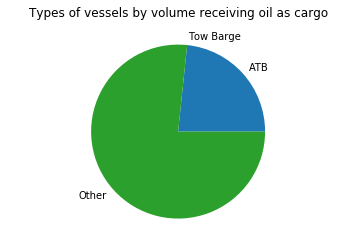

In [78]:
volume_export_byvessel = [oil_traffic['cargo']['atb_volume_export'], oil_traffic['cargo']['barge_volume_export'], oil_traffic['cargo']['other_export']]
#colors = ['b', 'g', 'r', 'c', 'm', 'y']
labels = ['ATB', 'Tow Barge','Other']
plt.gca().axis("equal")
plt.pie(volume_export_byvessel, labels= labels)
plt.title('Types of vessels by volume receiving oil as cargo')

(3333, 5)

### Add up volume transferred by fuel type 

In [39]:
# Add up the total volume of marine transport by product (this includes all transfers)
gas_export_data     = cargo_data[cargo_data['Product']=='GASOLINE']
gas_export_total = gas_export_data['TransferQtyInGallon'].sum()

diesel_export_data  = cargo_data[cargo_data['Product']=='DIESEL/MARINE GAS OIL']
diesel_export_total = diesel_export_data['TransferQtyInGallon'].sum()

bunker_export_data  = cargo_data[cargo_data['Product']=='BUNKER OIL/HFO']
bunker_export_total = bunker_export_data['TransferQtyInGallon'].sum()

jet_export_data   = cargo_data[cargo_data['Product']=='JET FUEL/KEROSENE']
jet_export_total  = jet_export_data['TransferQtyInGallon'].sum()

ulsd_export_data  = cargo_data[cargo_data['Product']=='DIESEL LOW SULPHUR (ULSD)']
ulsd_export_total = ulsd_export_data['TransferQtyInGallon'].sum()

crude_export_data  = cargo_data[cargo_data['Product'].str.contains('CRUDE')]
crude_export_total = crude_export_data['TransferQtyInGallon'].sum()

Other_fuel_total = cargo_data['TransferQtyInGallon'].sum() - crude_export_total - ulsd_export_total - jet_export_total - bunker_export_total - diesel_export_total - gas_export_total 

### Plot up results

Text(0.5,1,'Marine Oil Export from WA Refineries and Terminals')

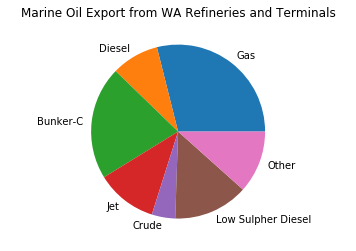

In [53]:
oil_export_values = [gas_export_total, diesel_export_total , bunker_export_total, jet_export_total, crude_export_total, ulsd_export_total, Other_fuel_total]
#colors = ['b', 'g', 'r', 'c', 'm', 'y']
labels = ['Gas', 'Diesel', 'Bunker-C', 'Jet', 'Crude', 'Low Sulpher Diesel', 'Other']
plt.gca().axis("equal")
plt.pie(oil_export_values, labels= labels)
plt.title('Marine Oil Export from WA Refineries and Terminals')

In [12]:
oil_traffic['destination']

{'GLOBAL PILOT': 'GLOBAL PILOT',
 'Phillips 66 Ferndale Refinery': 'Phillips 66 Ferndale Refinery',
 'NATHAN SCHMIDT': 'NATHAN SCHMIDT',
 'BP Cherry Point Refinery': 'BP Cherry Point Refinery',
 'SeaPort Sound Terminal': 'SeaPort Sound Terminal',
 'Shell Oil LP Seattle Distribution Terminal': 'Shell Oil LP Seattle Distribution Terminal',
 'ATB BARGE KIRBY 185-01': 'ATB BARGE KIRBY 185-01',
 'CARTAGENA': 'CARTAGENA',
 'PROFESSOR KAREN ANN BROWN': 'PROFESSOR KAREN ANN BROWN',
 'ATB BARGE 550-2': 'ATB BARGE 550-2',
 'ATB BARGE FIGHT FANCONI ANEMIA': 'ATB BARGE FIGHT FANCONI ANEMIA',
 'Tidewater Snake River Terminal': 'Tidewater Snake River Terminal',
 'NEW ENDEAVOR': 'NEW ENDEAVOR',
 'Phillips 66 Tacoma Terminal': 'Phillips 66 Tacoma Terminal',
 'HMS 2000': 'HMS 2000',
 'Andeavor Anacortes Refinery (formerly Tesoro)': 'Andeavor Anacortes Refinery (formerly Tesoro)',
 'YON-319': 'YON-319',
 'Naval Air Station Whidbey Island (NASWI)': 'Naval Air Station Whidbey Island (NASWI)',
 'DR. BONNIE